# Initialize dependencies and get data

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [5]:
# https://storage.googleapis.com/tensorflow/tf-keras-datasets/mnist.npz

# the data, shuffled and split between train and test sets
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

import numpy as np

path = "./datasets/mnist.npz"
with np.load(path, allow_pickle=True) as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

In [6]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

# Pre-process image data

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Build a CNN based deep neural network

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Visualize the network architecture

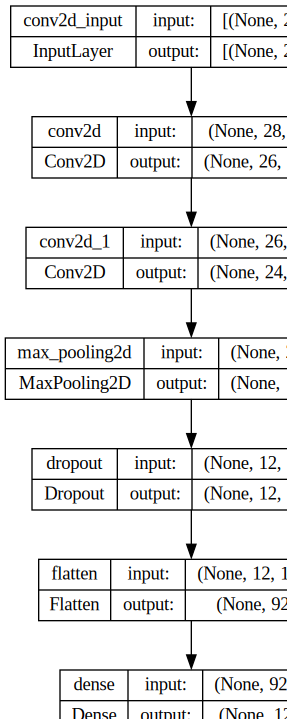

In [10]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, 
                 show_layer_names=True, rankdir='TB').create(prog='dot', format='svg'))

# Build the model

In [11]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/2
469/469 [==============================] - 43s 91ms/step - loss: 2.2948 - accuracy: 0.1303 - val_loss: 2.2717 - val_accuracy: 0.2099
Epoch 2/2
469/469 [==============================] - 42s 89ms/step - loss: 2.2572 - accuracy: 0.2045 - val_loss: 2.2267 - val_accuracy: 0.3170


# Predict and test model performance

In [13]:
score = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 2.2267 - accuracy: 0.3170


In [14]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.226673126220703
Test accuracy: 0.31700000166893005
